In [1]:
#VGG-16/VGGNet is a convolutional neural network that is 16 layers deep
#used for image recognition
#The VGG16 model can achieve a test accuracy of 92.7% in ImageNet
#a dataset containing more than 14 million training images across 1000 object classes

import tensorflow as tf
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [2]:
IMAGE_SIZE = [224,224]

In [3]:
train_path = 'mydata/train/'
valid_path = 'mydata/validation/'

In [4]:
vgg = VGG16(input_shape=(224,224,3),weights='imagenet',include_top=False)#output layer
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(1,activation='sigmoid')(x)

In [7]:
x.shape

TensorShape([None, 25088])

In [8]:
model = Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('mydata/train/',
                                               target_size=(224,224),
                                               batch_size=2,
                                               class_mode='binary')

Found 100 images belonging to 2 classes.


In [11]:
training_set.class_indices

{'avanti': 0, 'dad': 1}

In [12]:
test_set = test_datagen.flow_from_directory('mydata/validation/',
                                           target_size=(224,224),
                                           batch_size=2,
                                           class_mode='binary')

Found 40 images belonging to 2 classes.


In [13]:
history = model.fit(training_set,
                             validation_data=test_set,
                             epochs=5)

Epoch 1/5
50/50 [==============================] - 55s 1s/step - loss: 0.3363 - accuracy: 0.8700 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 2/5
50/50 [==============================] - 51s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 55s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 9.9611e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 52s 1s/step - loss: 6.3020e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000


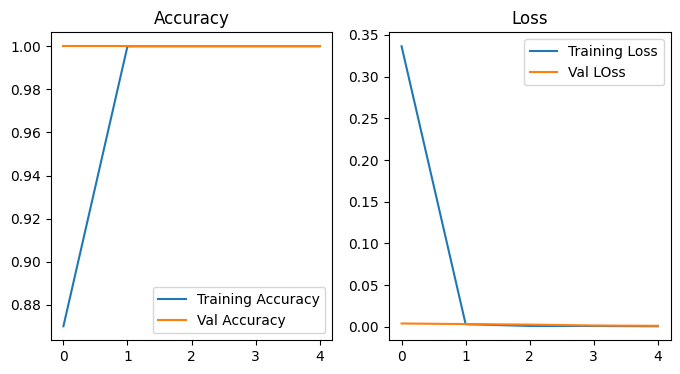

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

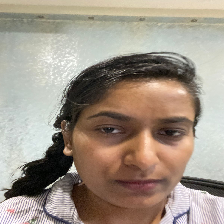

In [16]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
data_1 = load_img('mydata/validation/avanti/WhatsApp Image 2023-03-27 at 4.01.24 AM (1).jpeg',target_size=(224,224))
data_1

In [17]:
test_array = img_to_array(data_1)

In [18]:
test_array.shape

(224, 224, 3)

In [19]:
test_array = test_array.reshape(1,224,224,3)

In [20]:
model.predict(test_array)

1/1 [==============================] - 1s 722ms/step


array([[0.]], dtype=float32)